In [1]:
import folium as f
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
# import the data into geopandas (path will depend on where you downloaded the LINZ data)
df = gpd.read_file("lds-nz-road-centrelines-topo-150k-SHP/nz-road-centrelines-topo-150k.shp")
df.head()

,t50_fid,name_ascii,macronated,name,hway_num,rna_sufi,lane_count,way_count,status,surface,geometry
0,100091188,,N,,,0,4,,under construction,unmetalled,LINESTRING (172.6036285618527 -43.454508704192...
1,6749095,,N,,,0,4,,under construction,unmetalled,LINESTRING (174.8374380049008 -41.158313043243...
2,7642046,,N,,,0,2,,under construction,unmetalled,LINESTRING (175.2758285777895 -40.519236069521...
3,7643206,,N,,,0,2,,under construction,unmetalled,LINESTRING (175.158519524653 -40.7610997070290...
4,3224376,NORWICH STREET,N,NORWICH STREET,,1774681,1,,,sealed,LINESTRING (170.8114333062314 -45.325373227642...


Most of the headers are relatively clear but the detailed metadata for the dataset can be [found here](http://apps.linz.govt.nz/topo-data-dictionary/index.aspx?page=class-road_cl). For our purposes we'll look at roads by:
- __Surface type__ (str): sealed; metalled [e.g. gravel]; or unmetalled [e.g. clay or dirt]
- __Lanes__ (int): number of side-by-side lanes on the road [note this does not tell us the direction of the lanes only the total number]
- __Highways__ (str): whether the road is classified as a state highway or not [e.g. SH45]

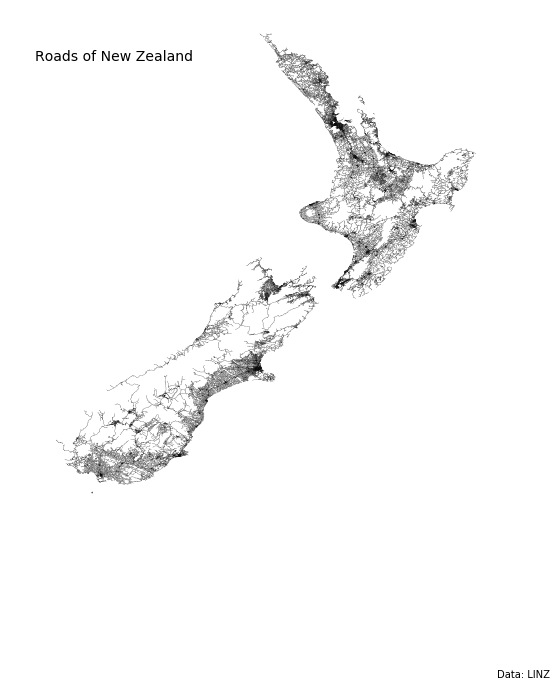

In [3]:
# plot the entire dataset
df.plot(linewidth=0.2, color="black", figsize=(8.27,11.69)) # figure size in inches (approx. A4 portrait size)
plt.title("Roads of New Zealand", fontsize=14, loc="left", pad=-50)
plt.axis("Off")
plt.figtext(0.99, 0.01, 'Data: LINZ', horizontalalignment='right') 
#plt.savefig("NZ_roads_low_res.png", format="png", dpi=50)
plt.savefig("NZ_roads.pdf", format="pdf", dpi=3000)

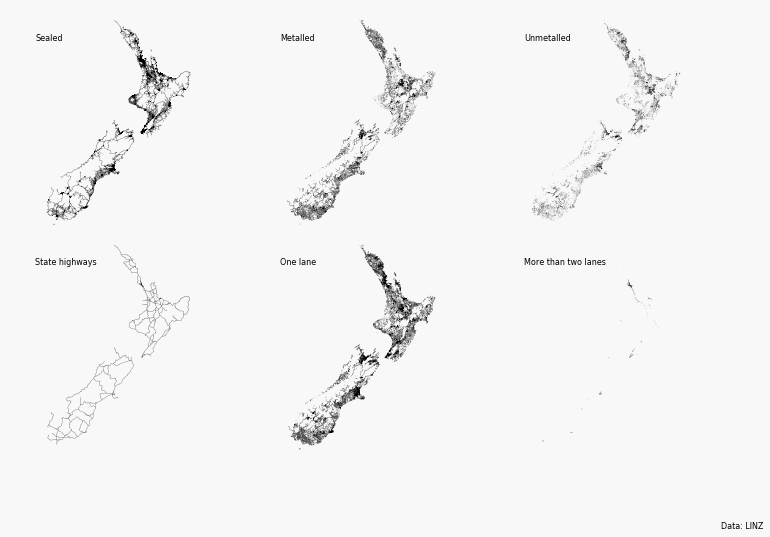

In [4]:
# seperate the data for each of the plots
g1 = df.loc[df['surface'] == 'sealed']
g2 = df.loc[df['surface'] == 'metalled']
g3 = df.loc[df['surface'] == 'unmetalled']
g4 = df.loc[df['hway_num'] != ""]
g5 = df.loc[df['lane_count'] == 1]
g6 = df.loc[df['lane_count'] > 2]

# create the subplots (figure approx. A4 landscape size)
fig, [[ax1, ax2, ax3], [ax4, ax5, ax6]] = plt.subplots(nrows=2, ncols=3, \
        sharex='col', sharey='row', figsize=(11.69, 8.27), \
        facecolor="#f8f8f8", gridspec_kw = {'wspace':0.5, 'hspace':0})

ax1 = g1.plot(ax=ax1, color="black", linewidth=0.2)
ax1.set_title("Sealed", fontsize=8, loc="left", pad=-30)
ax1.axis("Off")

ax2 = g2.plot(ax=ax2, color="black", linewidth=0.2)
ax2.set_title("Metalled", fontsize=8, loc="left", pad=-30)
ax2.axis("Off")

ax3 = g3.plot(ax=ax3, color="black", linewidth=0.2)
ax3.set_title("Unmetalled", fontsize=8, loc="left", pad=-30)
ax3.axis("Off")

ax4 = g4.plot(ax=ax4, color="black", linewidth=0.2)
ax4.set_title("State highways", fontsize=8,  loc="left", pad=-30)
ax4.axis("Off")

ax5 = g5.plot(ax=ax5, color="black", linewidth=0.2)
ax5.set_title("One lane", fontsize=8,  loc="left", pad=-30)
ax5.axis("Off")

ax6 = g6.plot(ax=ax6, color="black", linewidth=0.2)
ax6.set_title("More than two lanes", fontsize=8,  loc="left", pad=-30)
ax6.axis("Off")

plt.axis("Off")

plt.figtext(0.99, 0.01, 'Data: LINZ', horizontalalignment='right', fontsize=8) 
#plt.savefig("NZ_Roads_Six_Ways.png", format="png", dpi=1000)
plt.savefig("NZ_Roads_Six_Ways.pdf", format="pdf", dpi=1000)